In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [75]:
mnist = tf.keras.datasets.mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model= tf.keras.models.Sequential() #model type
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(128, activation='relu')) #hidden layer 1
model.add(tf.keras.layers.Dense(128, activation='relu')) #hidden layer 2
model.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer

model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)



Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8670 - loss: 0.4701
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9658 - loss: 0.1096
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9786 - loss: 0.0684


In [76]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.1002
0.08618185669183731 0.9731000065803528


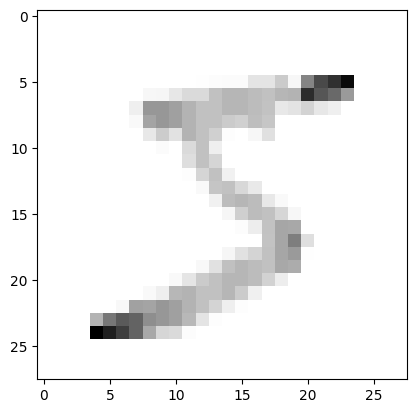

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [77]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()
print(x_train[0])

In [79]:
model.save('mnist_project.keras')

In [80]:
new_model = tf.keras.models.load_model('mnist_project.keras')

In [81]:
predictions = new_model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [82]:
print(predictions)

[[6.30388142e-09 2.78930723e-09 3.44902674e-06 ... 9.99979854e-01
  1.38079459e-08 6.62586501e-07]
 [6.11947186e-08 1.39815202e-05 9.99979377e-01 ... 1.11762044e-09
  5.18079517e-08 3.02486009e-12]
 [1.14706125e-07 9.99635458e-01 5.68706355e-06 ... 3.01358348e-04
  8.99400675e-06 9.40538953e-08]
 ...
 [1.36586626e-08 1.34763880e-07 5.78005945e-08 ... 3.46502711e-05
  1.14037005e-06 3.50259390e-04]
 [4.59813435e-07 3.65367191e-06 1.67321232e-05 ... 2.56520198e-05
  3.17834713e-03 3.53162086e-08]
 [9.55359724e-07 1.09128131e-07 1.36288668e-06 ... 1.14913135e-09
  7.61316460e-06 2.62706878e-09]]


In [83]:
import numpy as np
print(np.argmax(predictions[0]))

7


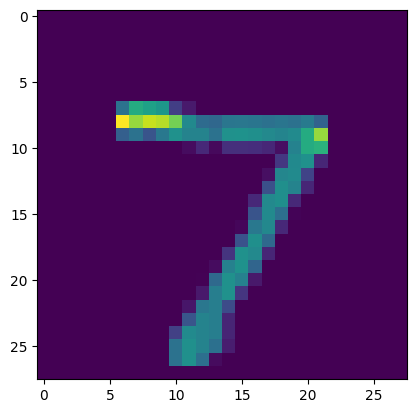

In [84]:
plt.imshow(x_test[0])